In [16]:
from sklearn.datasets import make_classification
import numpy as np

In [17]:
X,y = make_classification(n_samples = 100, n_features = 2, n_informative = 1,n_redundant = 0,n_classes = 2,n_clusters_per_class =1, random_state = 41,hypercube = False,class_sep = 10)

n_samples: You've set this to 100, which means the generated dataset will contain 100 samples (data points).

n_features: You've set this to 2, indicating that each sample will have 2 features (input variables).

n_informative: You've set this to 1, which means that out of the 2 features, only 1 will be informative and contribute to the classification task. The other feature won't provide useful information for classification.

n_redundant: You've set this to 0, indicating that there will be no redundant features. Redundant features are linear combinations of informative features that don't provide additional information.

n_classes: You've set this to 2, specifying that the classification problem will have 2 classes.

n_clusters_per_class: You've set this to 1, which means that each class will form 1 cluster in the feature space. This implies that the samples within each class will be relatively close together.

random_state: You've set this to 41, which is the random seed for reproducibility. Using the same seed will generate the same dataset if you run the code again.

hypercube: You've set this to False. When set to True, it generates data in a hypercube (all features range between 0 and 1). Since you've set it to False, the data might not be strictly confined to a hypercube.

class_sep: You've set this to 10. This parameter controls the separation between the classes in the feature space. A higher value will result in more separation between the classes.



In [18]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


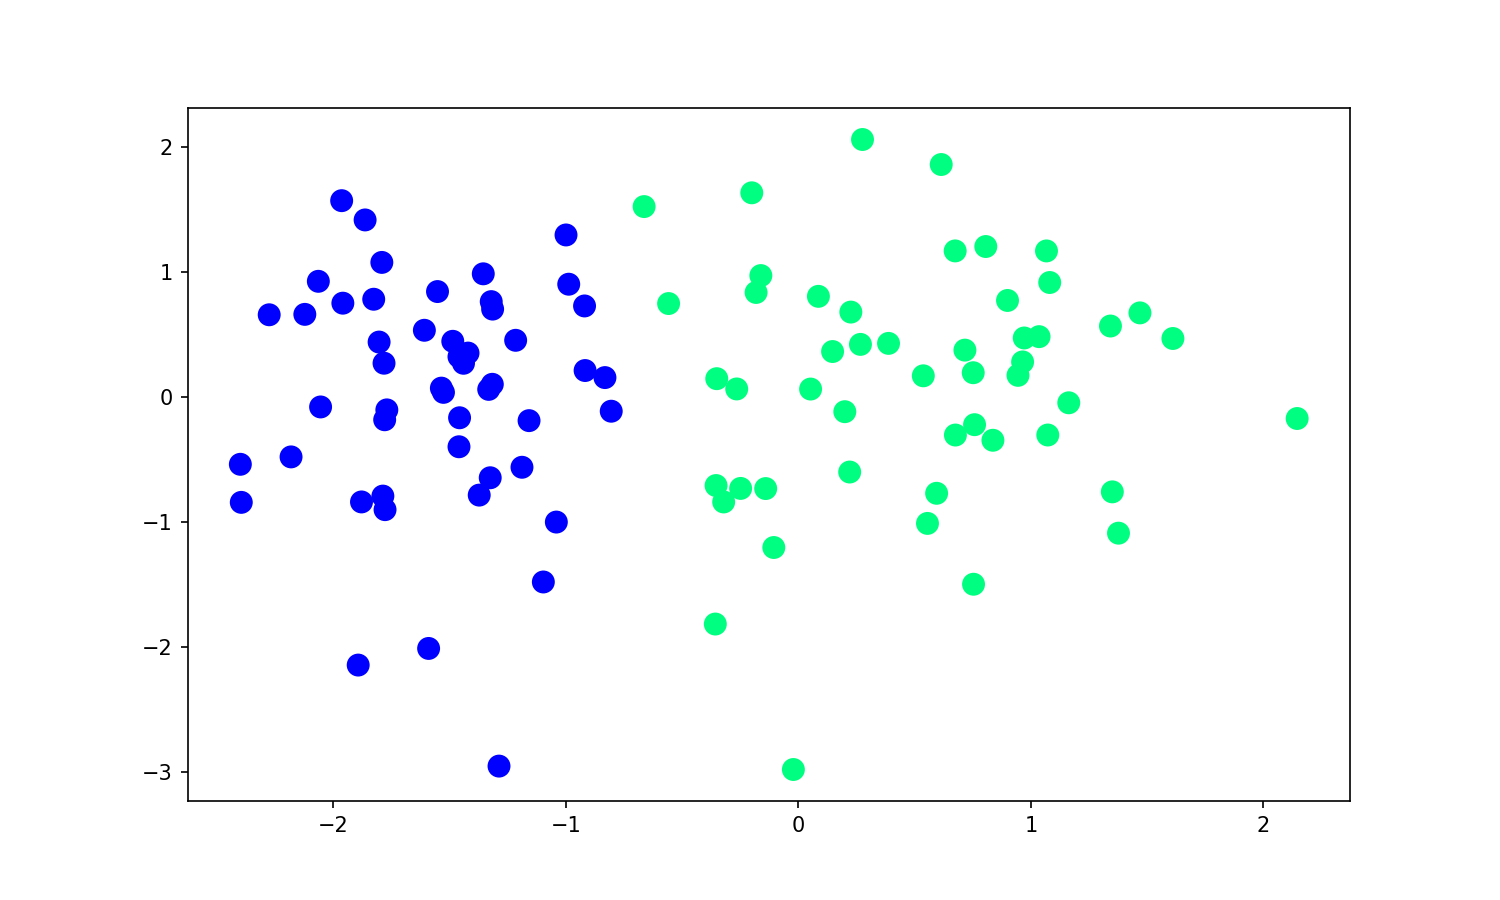

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [22]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [8]:
def step(z):
    return 1 if z>0 else 0
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.22824203 0.09684797]
1.0


(-3.0, 2.0)

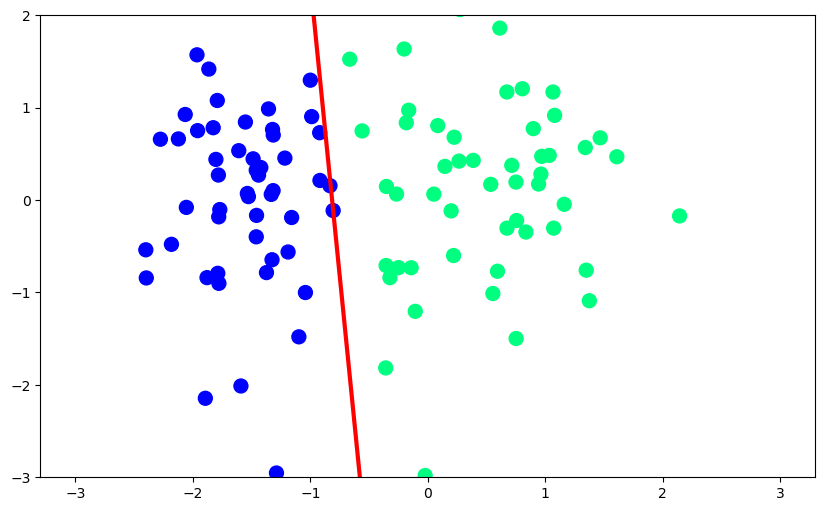

In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [10]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [11]:
m,b = perceptron(X,y)
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


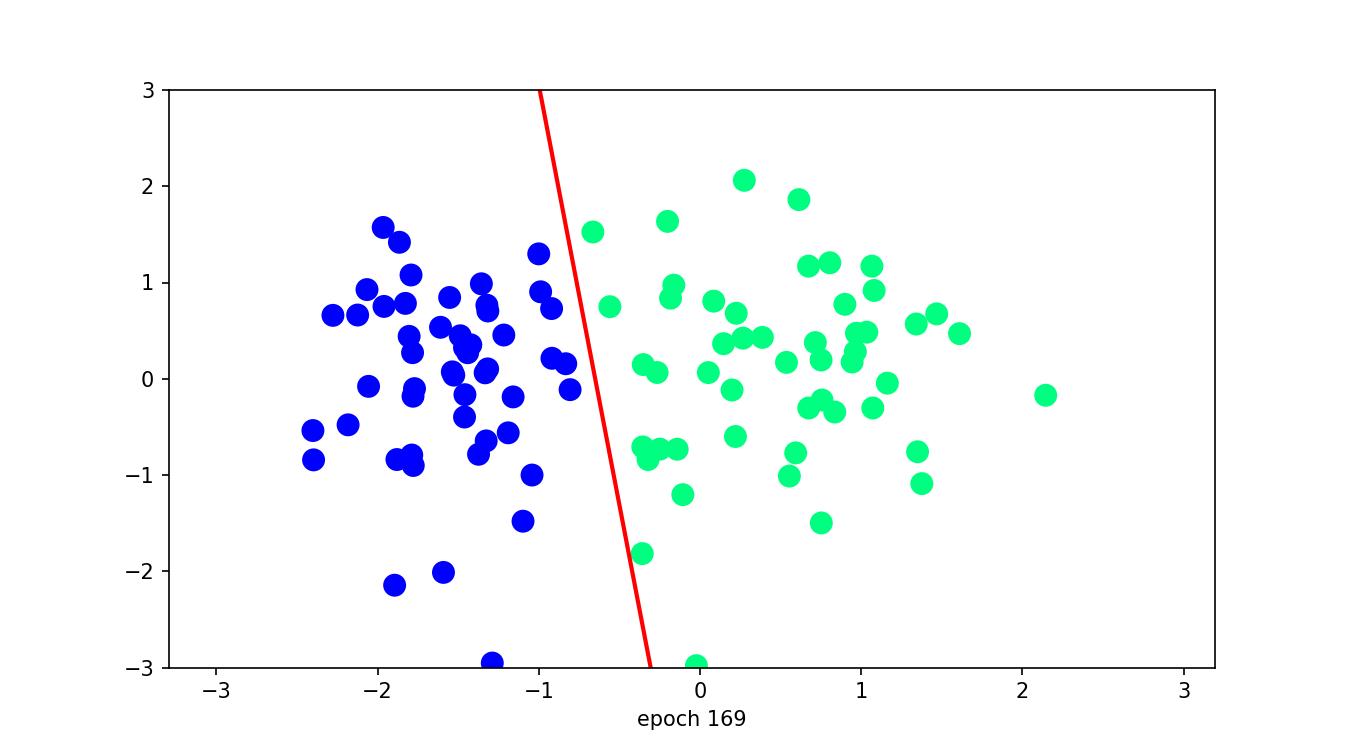

In [12]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [13]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

<IPython.core.display.Javascript object>


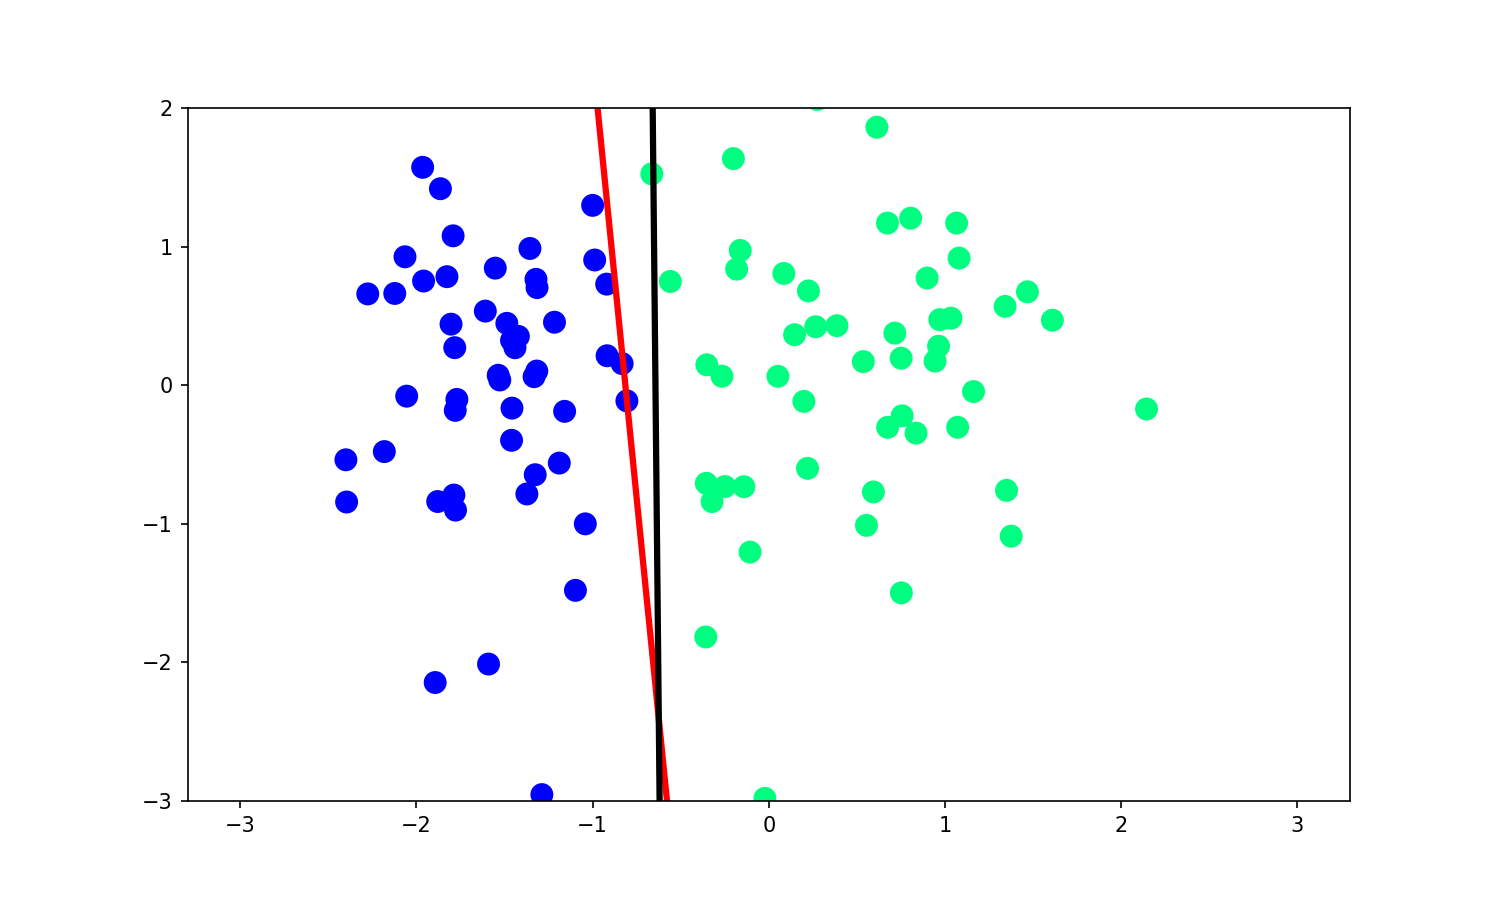

(-3.0, 2.0)

In [14]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])


x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b


plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)